# Image Classification

Using Convolutional Neural Network (CNN).
CNN is a type of neural network that is used for image classification and recognition. Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. This is related to a form of mathematical convolution. It is a specialized kind of neural network for processing data that has a known, grid-like topology. CNNs are powerful because they are scale invariant, and we can still recognize an object even if it is shifted a little bit. They are also resistant to distortions and affine transformations.
(Find a pattern regardless of where it shows up in the image)

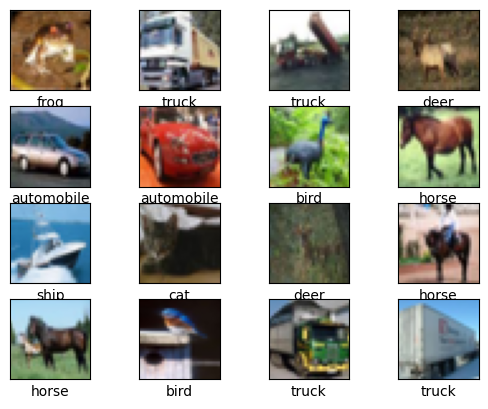

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets, layers, models

(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
#the following line is to normalize the data
#by dividing the pixel values by 255.0
training_images, testing_images = training_images/255.0, testing_images/255.0

classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[training_labels[i][0]])

plt.show()

In [4]:
# taking less data to improve speed
# meaning the following lines are unnecessary
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

model = models.Sequential()
# Conv2D is used to extract features from the image
# by sliding a filter window over the image
# 32 is the number of filters
# filters are the number of features to extract
# (3,3) is the size of the filter
# activation function is relu
# input shape is the shape of the image
# relu stands for rectified linear unit
# (32,32,3) is the shape of the image
# 32 by 32 pixels and 3 color channels
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
# MaxPooling2D is used to reduce the size of the image (simplfy it)
# by taking the maximum value of each 2x2 square
# maximum value means the brightest pixel value
# because the brightest pixel value is the most important
# this is done to reduce the number of parameters
# and to reduce the computation time
model.add(layers.MaxPooling2D((2,2)))
# now we use 64 because we want to extract more features
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# Flatten is used to convert the 2D array into a 1D array
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

model.save('image_classification.model')

Epoch 1/10
625/625 [==============================] - 17s 26ms/step - loss: 1.7066 - accuracy: 0.3719 - val_loss: 1.5161 - val_accuracy: 0.4530
Epoch 2/10
625/625 [==============================] - 17s 28ms/step - loss: 1.3820 - accuracy: 0.5071 - val_loss: 1.3650 - val_accuracy: 0.5100
Epoch 3/10
625/625 [==============================] - 16s 26ms/step - loss: 1.2349 - accuracy: 0.5656 - val_loss: 1.2625 - val_accuracy: 0.5375
Epoch 4/10
625/625 [==============================] - 18s 29ms/step - loss: 1.1335 - accuracy: 0.6006 - val_loss: 1.1334 - val_accuracy: 0.6022
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 1.0432 - accuracy: 0.6343 - val_loss: 1.0854 - val_accuracy: 0.6125
Epoch 6/10
625/625 [==============================] - 28s 44ms/step - loss: 0.9609 - accuracy: 0.6654 - val_loss: 1.0532 - val_accuracy: 0.6248
Epoch 7/10
625/625 [==============================] - 19s 30ms/step - loss: 0.9004 - accuracy: 0.6827 - val_loss: 1.0048 - val_accuracy

INFO:tensorflow:Assets written to: image_classification.model\assets


In [5]:
model = models.load_model('image_classification.model')

loss, accuracy = model.evaluate(testing_images, testing_labels)
print('Loss:', loss)
print('Accuracy:', accuracy)

125/125 [==============================] - 6s 46ms/step - loss: 0.9853 - accuracy: 0.6683
Loss: 0.9852603077888489
Accuracy: 0.6682500243186951


In [7]:
model = models.load_model('image_classification.model')

images = ['horse.jpg', 'plane.jpg', 'deer.jpg']
for i in range(len(images)):
    img = cv.imread(images[i])
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    prediction = model.predict(np.array([img])/255.0)
    index = np.argmax(prediction)
    print(classes[index])

1/1 [==============================] - 0s 64ms/step
[[3.5804581e-07 3.4080591e-07 3.2419044e-05 1.2025589e-06 1.7968068e-03
  1.7691836e-04 6.2108420e-06 9.9798191e-01 6.9423584e-10 3.8427679e-06]]
horse
